In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import func
from sqlalchemy import create_engine, inspect

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float

In [4]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
#class measurement(Base):

Base.prepare(autoload_with=engine)

In [6]:
# Print all of the classes mapped to the base

Base.classes.keys()

['station', 'measurement']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# assign the station class to a variable called `Station`
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create a session
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23',)

2016-08-23


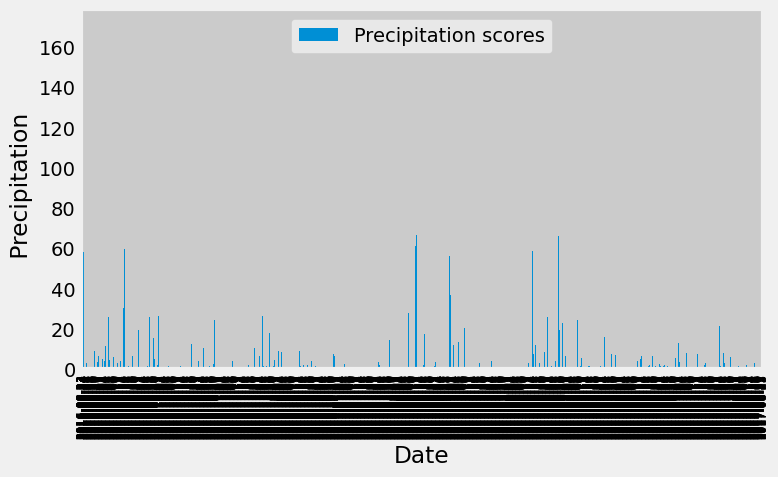

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
date_last=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Calculate the date one year from the last date in data set.
year_ago=dt.date(2017, 8, 23) - dt.timedelta(days=365)
print (year_ago)
# Perform a query to retrieve the data and precipitation scores
session.query(Measurement.date).filter(Measurement.date.between('2016-08-23' , '2017-08-23'))

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df=pd.read_sql(session.query(Measurement.prcp).filter(Measurement.date.between('2016-08-23', '2017-08-23')).statement,session.bind)
Date_df=pd.read_sql(session.query(Measurement.date).filter(Measurement.date.between('2016-08-23', '2017-08-23')).statement,session.bind)
prcp_last_12_months=pd.merge(Date_df, prcp_df, left_index=True, right_index=True)
#prcp_last_12_months.rename({'prcp': 'Precipitation scores','date':'Date'}, axis=1, inplace=True)
prcp_last_12_months_df = pd.DataFrame({
    "Date": prcp_last_12_months.date,
    "Precipitation scores": prcp_last_12_months.prcp
})
prcp_last_12_months_df.set_index('Date', inplace=True)

# Sort the dataframe by date
prcp_last_12_months_df.sort_values(by=['Date'], inplace=True, ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_chart = prcp_last_12_months_df.plot(kind="bar", figsize=(8,5))
prcp_chart.set_xlabel("Date")
prcp_chart.set_ylabel(" Precipitation")
plt.xticks(rotation=90, fontsize='xx-small')
plt.tight_layout()
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_last_12_months_df['Precipitation scores'].describe()

count    2021.000000
mean        4.505888
std        11.713487
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: Precipitation scores, dtype: float64

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
station = session.query(Station.station)

In [13]:
station.distinct().count()

9

In [45]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(Measurement.station.desc()).first()


('USC00519523', 2669)

In [49]:

# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(Measurement.station.desc()).all()


[('USC00519523', 2669),
 ('USC00519397', 2724),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979)]

In [55]:
# Using the most active station id from the previous query, calculate the lowest, highest temperature.
session.query(Measurement.station, func.max(Measurement.tobs)).filter(Measurement.station=='USC00519523').all()

[('USC00519523', 29.4)]

In [56]:
# lowest temperature.
session.query(Measurement.station, func.min(Measurement.tobs)).filter(Measurement.station=='USC00519523').all()

[('USC00519523', 13.3)]

In [57]:
# Average temperature.
session.query(Measurement.station, func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519523').all()

[('USC00519523', 23.634057699512926)]

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [79]:
session.query( Measurement.date, Measurement.tobs).\
    filter(Measurement.station=='USC00519523' ).\
    filter(Measurement.date.between('2016-08-23', '2017-08-23')).first()
    

('2016-08-23', 26.7)

In [78]:
tob_station=pd.read_sql(session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station=='USC00519523' ).\
    filter(Measurement.date.between('2016-08-23', '2017-08-23')).statement,session.bind)
    

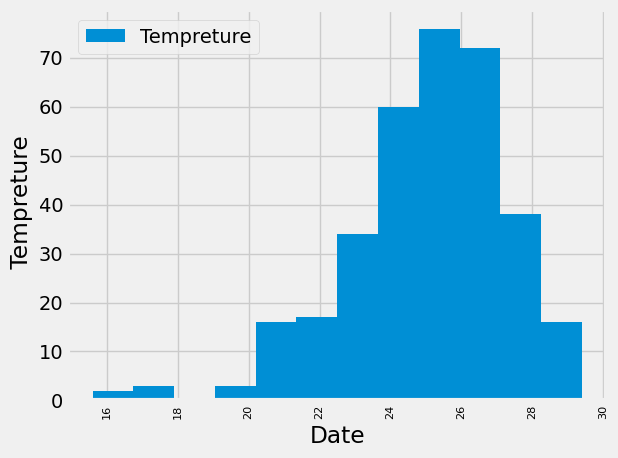

In [84]:


# Use Pandas Plotting with Matplotlib to plot the data
temp_chart =tob_station.plot(kind="hist", bins=12)
temp_chart.set_xlabel("Date")
temp_chart.set_ylabel(" Tempreture")
plt.xticks(rotation=90, fontsize='xx-small')
plt.tight_layout()
plt.show()

    

# Close Session

In [ ]:
# Close Session
session.close()
